### Bike Sharing Dataset
#### BoomBikes Bike Sharing Prediction - Regression Problem

Description:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demand
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Bussiness Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

Acknowledgement:
This dataset is referred from Kaggle & UCI Repository.

Objective:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the share of bikes.
Also evaluate the models & compare their respective scores like R2, RMSE, etc.

https://www.kaggle.com/datasets/yasserh/bike-sharing-dataset

We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:

1- Data Exploration

2- Exploratory Data Analysis (EDA)

3- Data Pre-processing

4- Data Manipulation

5- Feature Selection/Extraction

6- Predictive Modelling

7- Project Outcomes & Conclusion 

### 1. Data Exploration

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Modelos
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet

from sklearn.metrics import r2_score

from sklearn.model_selection import KFold, cross_val_score


c:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_bike =  pd.read_csv('C:\desarrollo\proyectos\datasets\sharing_bike\day.csv')

df_bike.drop(['dteday','instant'], axis=1, inplace=True)
#Saco los valores de tiempo autoincrementales. Me guío con el index natural.

print(df_bike.columns)
print(f'Tamaño dataset : {df_bike.shape}')
df_bike.head(5)


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')
Tamaño dataset : (730, 14)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [4]:
# Si quisiera convertir el valor de de 'dtday'
# Importante hacerlo para la 
#df_bike['dteday'] = pd.to_datetime(df_bike['dteday'])

In [5]:
# Para ver valores unicos del dataset
df_bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
dtype: int64

### 2. Exploratory Data Analysis (EDA)

In [6]:
#Checking number of unique rows in each feature

target = 'cnt'
features = [i for i in df_bike.columns if i not in [target]]

nu = df_bike[features].nunique().sort_values()
nf = []; cf = [] ; #numerical & categorical features

for i in range(df_bike[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 6 numerical & 7 categorical features.


                               Visualising Categorical Features:                                


c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\LENOVO\anaconda3\li

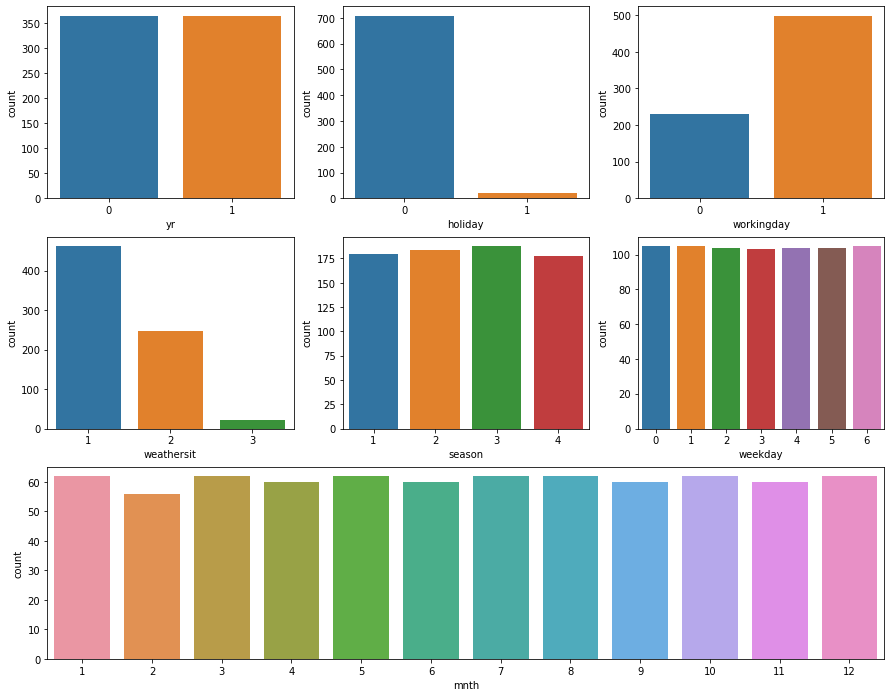

In [7]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,4*math.ceil(len(cf)/n)])


for i in range (len(cf)):
    if df_bike[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)  #subplot(nrows, ncols, index, **kwargs)
        sns.countplot(df_bike[cf[i]]) # Argument: Data 
    else:
        plt.subplot(3,1,3) #subplot(nrows, ncols, index, **kwargs)
        sns.countplot(df_bike[cf[i]])

plt.tight_layout
plt.show()
        

#### Revisamos la variable Objetivo "Count"

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


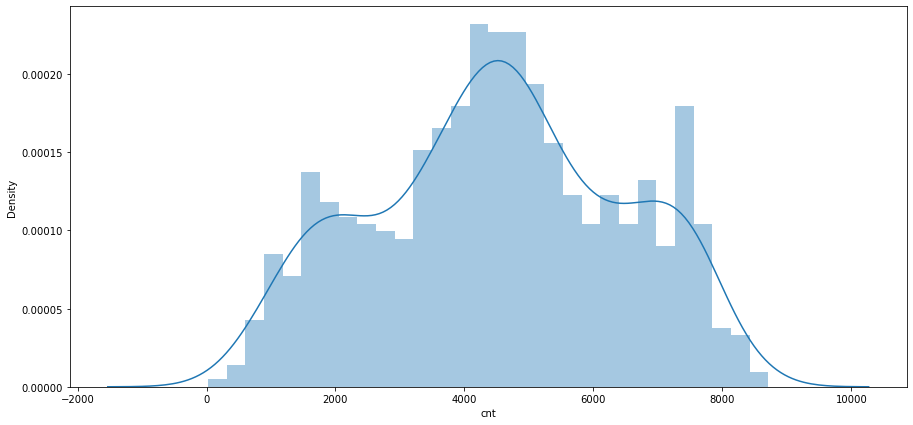

In [8]:
df_bike_target = df_bike.iloc[:,13]
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot( a=df_bike_target, hist=True, kde=True, rug=False, bins=30 )
plt.show()

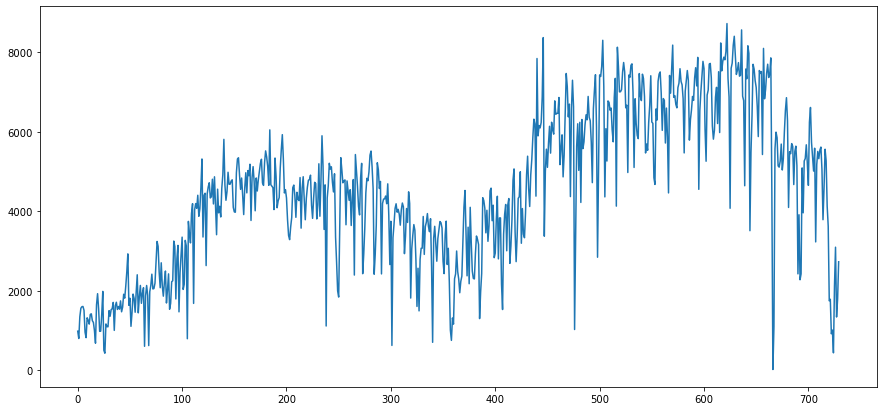

In [9]:
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(df_bike_target) 

In [10]:
df_bike.describe().round(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.0,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,2.50,0.5,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,1.11,0.5,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,0.0,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,2.00,0.0,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,3.00,0.5,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,3.00,1.0,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,4.00,1.0,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


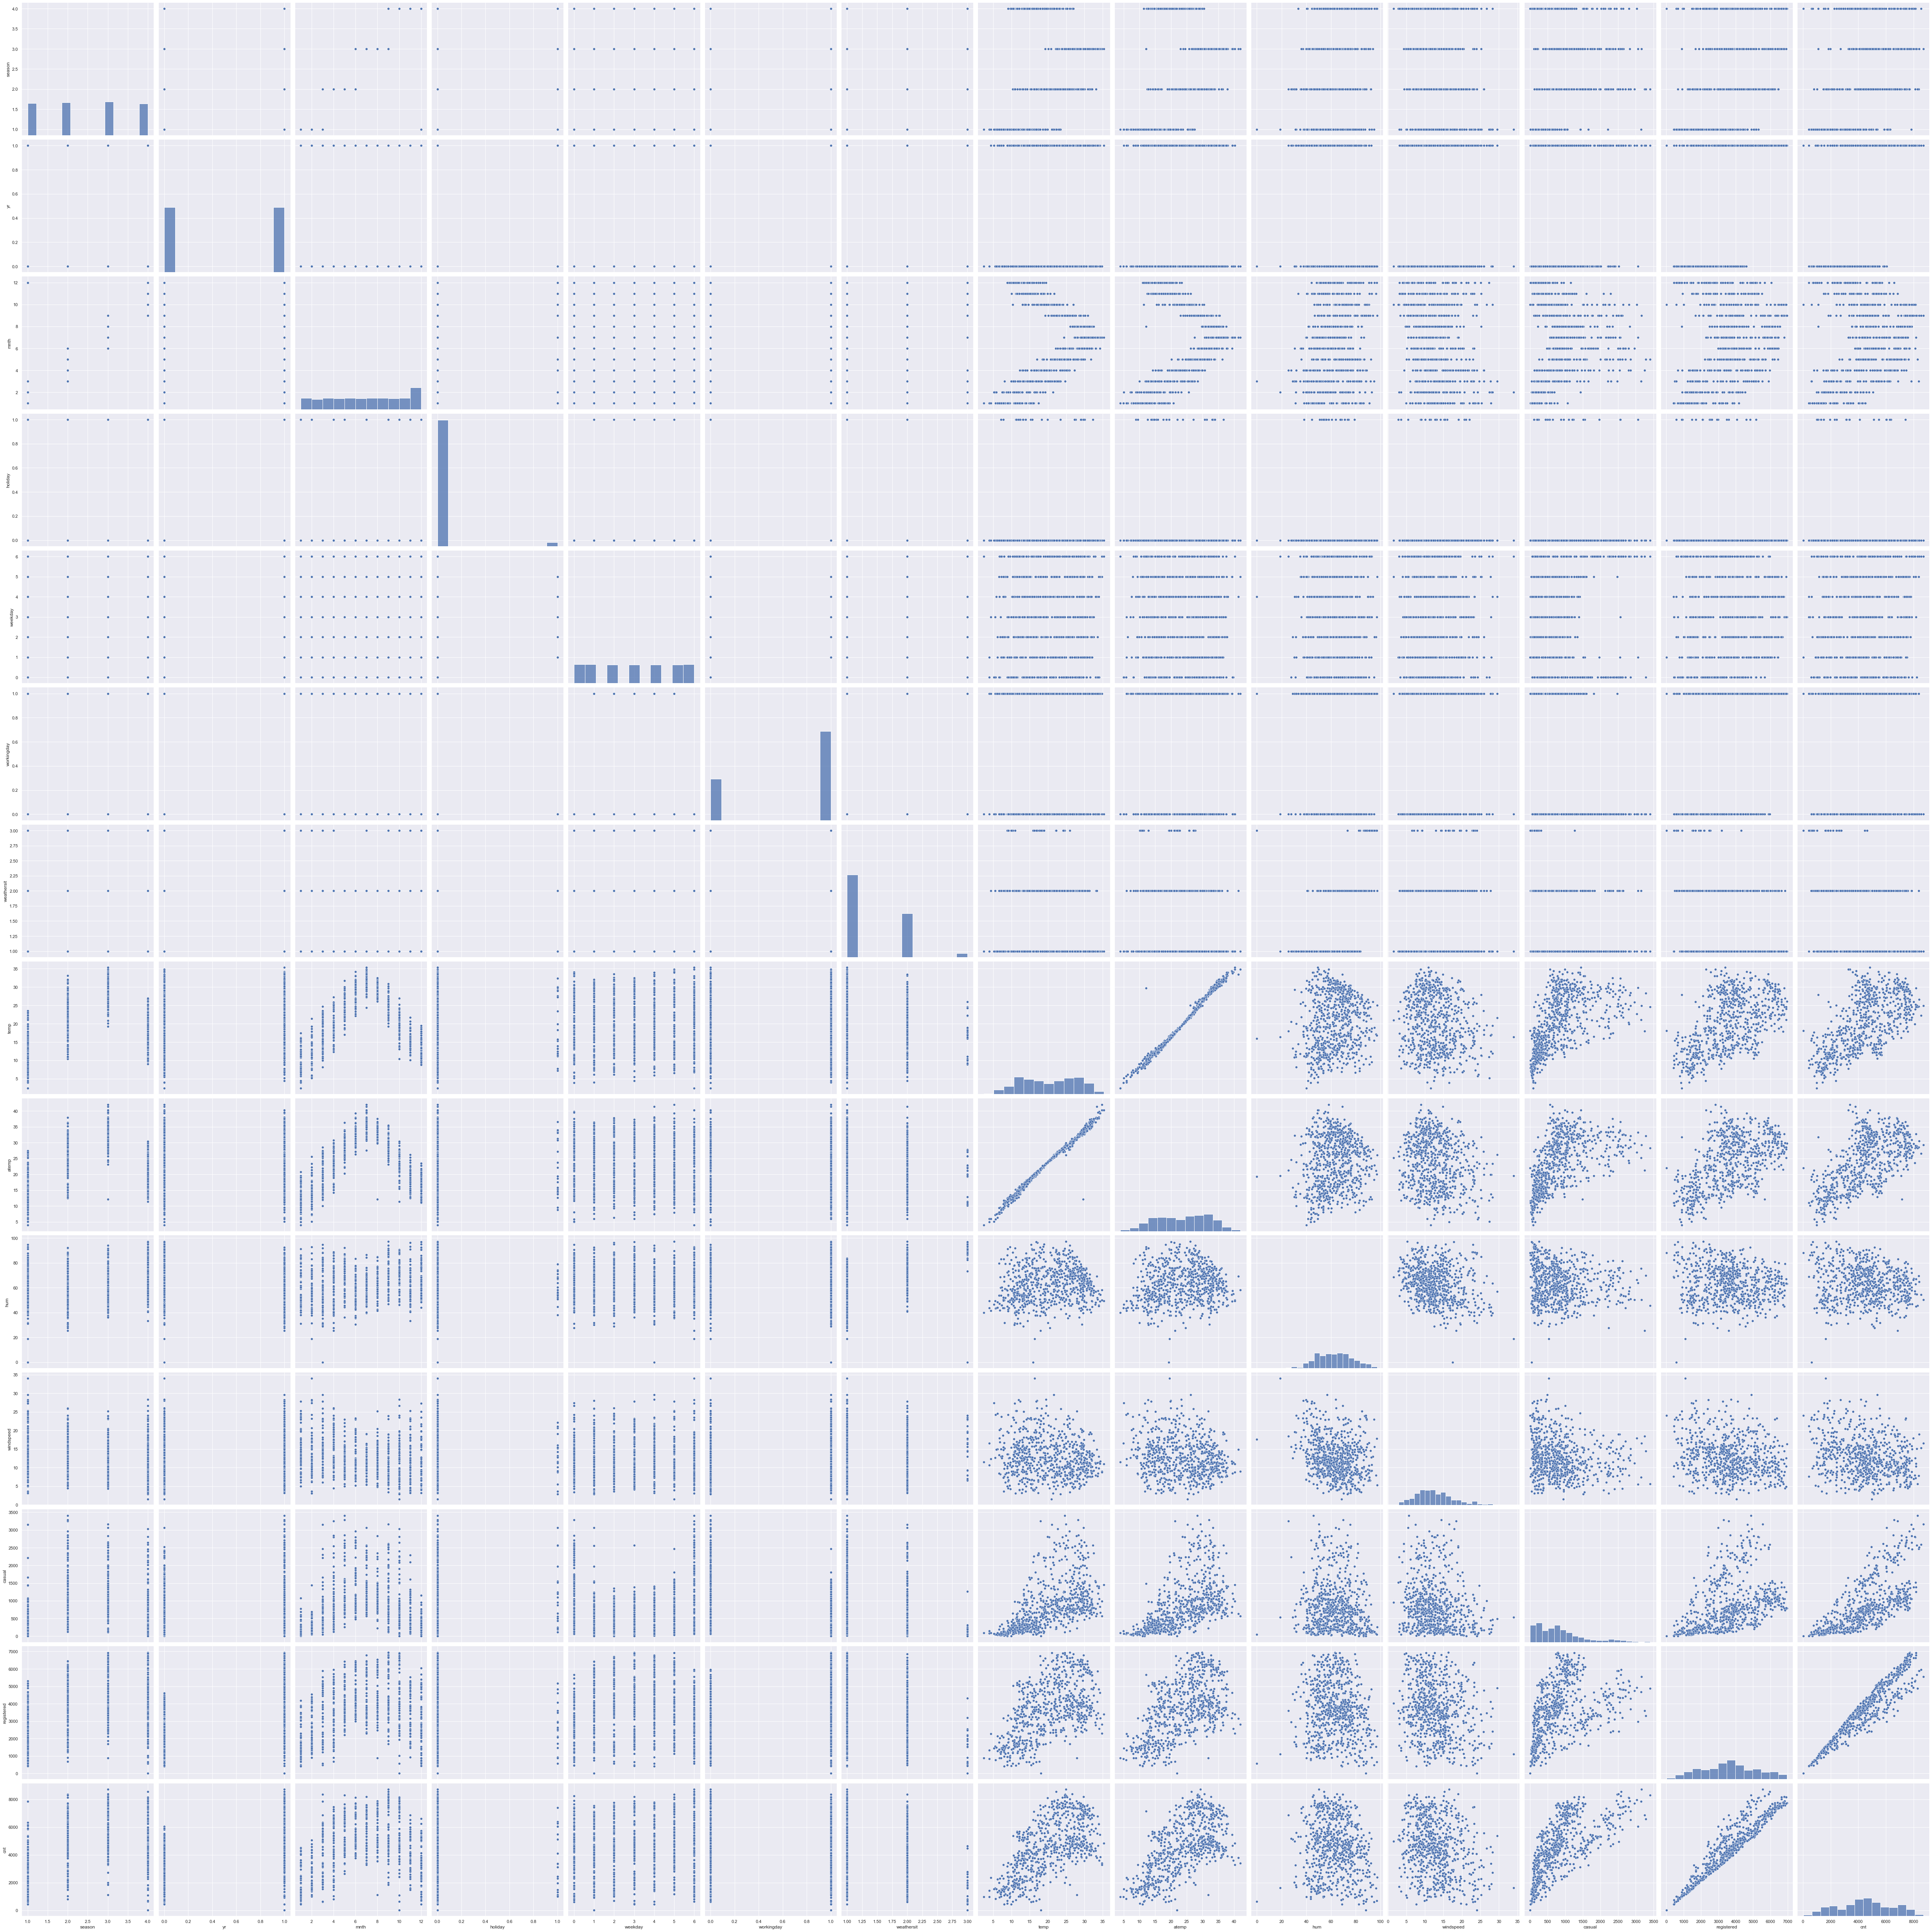

In [11]:
sns.set()
b = sns.pairplot(df_bike,size = 5) #hue='cnt'



<AxesSubplot:>

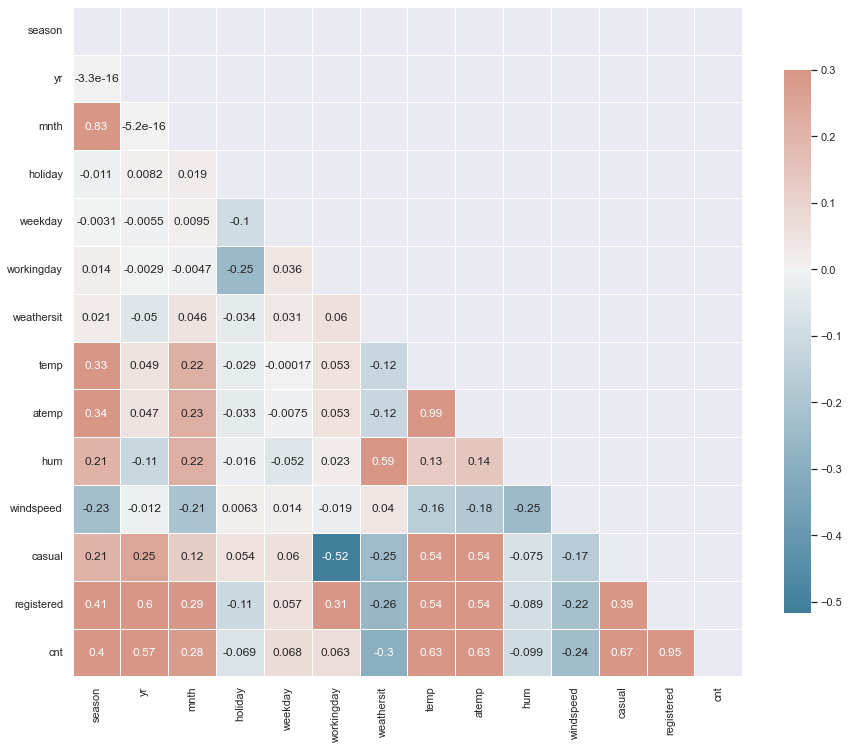

In [12]:
#Matriz de Correlaciones

corr = df_bike.corr()

#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### 3. Data Pre-Processing
##### Revisamos valores nulos, eliminamos outliers y normalizamos la informacion realizando "OneHotEncoding" a las variables categóricas y luego normalizando entre 0 y 1 las variables numericas

#### Misssings Values

In [13]:
null_df = pd.DataFrame(df_bike.isnull().sum().sort_values(),columns=['Total Null Values'])
null_df['Percentage'] = round(null_df['Total Null Values']/df_bike.shape[0],3)*100
null_df

,Total Null Values,Percentage
season,0,0.0
yr,0,0.0
mnth,0,0.0
holiday,0,0.0
weekday,0,0.0
workingday,0,0.0
weathersit,0,0.0
temp,0,0.0
atemp,0,0.0
hum,0,0.0


#### Dummys y One Hot Enconding

In [14]:
df_bike_norm = df_bike.copy()

ecc = null_df[null_df['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]

#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df_bike_norm[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df_bike_norm[i]=pd.get_dummies(df_bike_norm[i], drop_first=True, prefix=str(i))
    if (df_bike_norm[i].nunique()>2 and df_bike_norm[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df_bike_norm = pd.concat([df_bike_norm.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df_bike_norm[i], drop_first=True, prefix=str(i)))],axis=1)
        
print(df_bike_norm.shape)
print(df_bike_norm.columns)


One-Hot Encoding on features:
yr
holiday
workingday

Dummy Encoding on features:
weathersit
season
weekday
mnth
(730, 32)
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'weathersit_2', 'weathersit_3',
       'season_2', 'season_3', 'season_4', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12'],
      dtype='object')


##### Outliers





In [15]:
df1 = df_bike_norm.copy()


numerical_features = nf

#Removemos los oultiers de las variables numericas del problema.
#['temp', 'hum', 'casual', 'windspeed', 'registered', 'atemp']

for i in numerical_features:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df_bike_norm.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 730 samples.
After removal of outliers, The dataset now has 672 samples.


In [16]:
X = df1.drop('cnt',axis=1)
y = df1.loc[:,'cnt']


### 6. Predictive Modelling



#### Regularizacion
Notamos que el R2 nos da 1 por lo que podriamos tener problemas de multicolinealidad. Para eso Regularizamos con Ridge , Lasso y Elastic Nets y vemos los resultados.
Para utilizar las variables, vamos primero a ver cuales son las mas importantes a partir del método del VIF


In [17]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_df = pd.DataFrame()
vif_df['features'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values,i) for i in range (len(X.columns))]

vif_df.sort_values(by='VIF', inplace = True, ascending=False )
vif_df = vif_df.reset_index(drop=True)
vif_df


c:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,weekday_2,inf
1,weekday_3,inf
2,workingday,inf
3,weekday_5,inf
4,weekday_4,inf
5,weekday_1,inf
6,holiday,inf
7,temp,628.381483
8,atemp,607.187565
9,registered,48.818090


In [18]:
#Guardamos dentro de la lista DROP las variables que vamos descartando
DROP=[]

for i in range(len(X.columns)):
    vif = pd.DataFrame()
    X_vif = X.drop(DROP,axis=1)
    vif['Features'] = X_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>10:
        DROP.append(vif.loc[0][0])

print('VIF <= 10')        
print('Dropped Features --> ',DROP)

Xvif = [i for i in X.columns if i not in DROP]

print('Rest of features --->' ,Xvif)
vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop=True, inplace=True)
vif

c:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF <= 10
Dropped Features -->  ['weekday_2', 'temp', 'atemp', 'registered', 'hum', 'season_3', 'workingday']
Rest of features ---> ['yr', 'holiday', 'windspeed', 'casual', 'weathersit_2', 'weathersit_3', 'season_2', 'season_4', 'weekday_1', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12']


,Features,VIF
0,casual,7.85
1,season_4,7.16
2,season_2,6.68
3,windspeed,5.42
4,mnth_10,4.48
5,mnth_5,4.38
6,mnth_11,4.34
7,mnth_4,4.29
8,mnth_6,3.19
9,mnth_12,2.75


In [19]:
#Dejamos solamente los features seleccionados 

X_feat = X.copy()[Xvif]
y = y.copy()

In [20]:
#Volvemos a entrenar nuestras regresiones con los nuevos valores de columnas

estimadores = {'Reglin':LinearRegression(),'ElasticsNet': ElasticNet(),'Lasso':Lasso(),'Ridge':Ridge()}



for nom_est,obj_est in estimadores.items():
    kfold = KFold(n_splits = 4, shuffle=False)
    puntuacion = cross_val_score(estimator = obj_est , X = X_feat , y= y , cv=kfold , scoring ='r2' ) 
    print(f'{nom_est:>16}:'+ f' Promedio Puntajes R2 = {puntuacion.mean():.2%}')


          Reglin: Promedio Puntajes R2 = 67.20%
     ElasticsNet: Promedio Puntajes R2 = 2.63%
           Lasso: Promedio Puntajes R2 = 67.75%
           Ridge: Promedio Puntajes R2 = 68.08%


Conclusiones:

El dataset presenta problemas de multicolinealidad entre variables, es por eso que se ha reducido el número de columnas para la regresión.

La solucion por excelencia a este problema es aumentar el "tamaño de la muestra (n)" para reducir la Varianza que introduce la multicolinealidad en las variables.

La mejor estimación se ha conseguido con una Regresion Lasso, pero la estimación con un modelo de Regresion Lineal común es igual de significativa.

Entre otras soluciones, se prodria intentar mezclar en una suerte de indice aquellas variables Dropeadas por multicolinealidad en una sola y agregar al modelo. (Ejemplo: temperatura y humedad). Recordemos que cuando elimino el problema de multicolinealidad y bajo la varianza de los estimadores, la variable pasa aumtomaticamente a formar parte del error y puedo comprar un problema mas grande ya que introduzco sesgo al estimador.